In [1]:
#Installation of required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

sns.set()

In [2]:
#Reading the datasets
df = pd.read_csv("oasis_longitudinal.csv")
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
df = df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
df = df.reset_index(drop=True) # reset index after filtering first visit data
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Drop unnecessary columns

In [4]:
df

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,1,0,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,0,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,1,0,1,71,16,NaN,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...
145,OAS2_0182,1,0,1,73,12,NaN,23.0,0.5,1661,0.698,1.056
146,OAS2_0183,0,0,0,66,13,2.0,30.0,0.0,1495,0.746,1.174
147,OAS2_0184,1,0,0,72,16,3.0,24.0,0.5,1354,0.733,1.296
148,OAS2_0185,1,0,1,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [5]:
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

Text(0.5, 1.0, 'Gender and Demented rate')

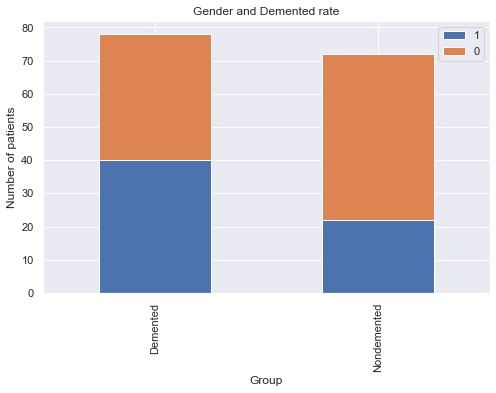

In [6]:
# Gender  and  Group ( Female=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

**The above graph indicates that men are more likely with dementia than women.

(15.3, 30.0)

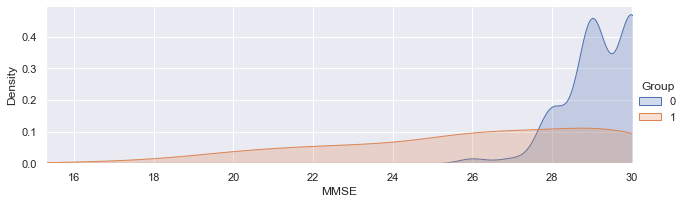

In [7]:
#MMSE : Mini Mental State Examination
# Nondemented = 0, Demented =1
# Nondemented has higher test result ranging from 25 to 30. 
#Min 17 ,MAX 30
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

**The chart shows Nondemented group got much more higher MMSE scores than Demented group.

(0.6, 0.9)

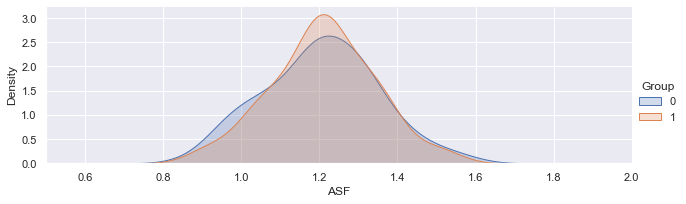

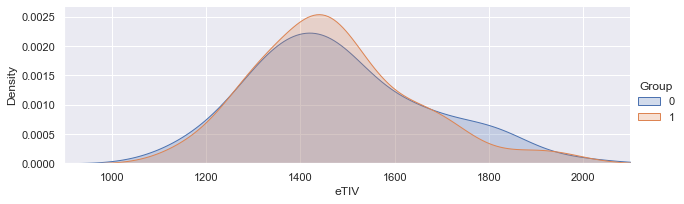

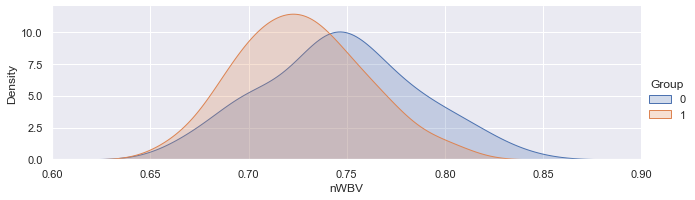

In [8]:
#bar_chart('ASF') = Atlas Scaling Factor
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

#eTIV = Estimated Total Intracranial Volume
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

#'nWBV' = Normalized Whole Brain Volume
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

**The chart indicates that Nondemented group has higher brain volume ratio than Demented group. This is assumed to be because the diseases affect the brain to be shrinking its tissue.

(50.0, 100.0)

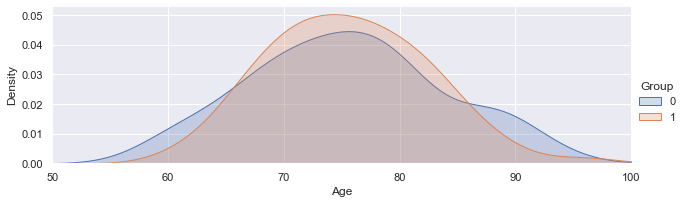

In [9]:
#AGE. Nondemented =0, Demented =0
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

**There is a higher concentration of 70-80 years old in the Demented patient group than those in the nondemented patients. We guess patients who suffered from that kind of disease has lower survival rate so that there are a few of 90 years old.

(0.0, 0.16)

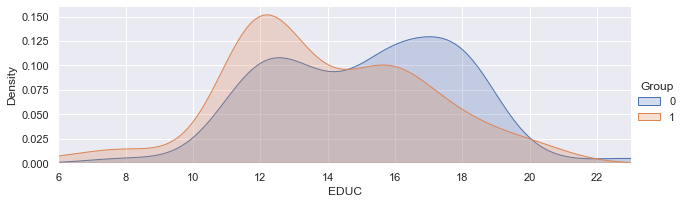

In [10]:
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)

**Intermediate Result Summary

1、Men are more likely with demented, an Alzheimer's Disease, than Women.

2、Demented patients were less educated in terms of years of education.

3、Nondemented group has higher brain volume than Demented group.

4、Higher concentration of 70-80 years old in Demented group than those in the nondemented patients.

# Data Preprocessing

In [11]:
# Check missing values by each column
pd.isnull(df).sum() 

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

**The column, SES has 8 missing values

In [12]:
# Dropped the 8 rows with missing values in the column, SES
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [13]:
df_dropna['Group'].value_counts()

0    72
1    70
Name: Group, dtype: int64

**Imputation

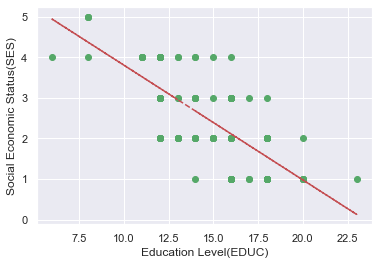

In [14]:
# Draw scatter plot between EDUC and SES
x = df['EDUC']
y = df['SES']

ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

# Draw trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()

In [15]:
df.groupby(['EDUC'])['SES'].median()

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [16]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

In [17]:
# Confirming there're no more missing values and all the 150 data were used.
pd.isnull(df['SES']).value_counts()

False    150
Name: SES, dtype: int64

# Splitting Train, Test and Validation Sets

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score

In [19]:
# Dataset with imputation
Y = df['Group'].values # Target for the model
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

# splitting into two sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y,test_size=0.3, random_state=0)

In [20]:
X_trainval.shape,X_test.shape

((105, 8), (45, 8))

# Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [22]:
best_score = 0
kfolds = 5
acc = []

for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree
            # train the model
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)

# Rebuild a model on the combined training and validation set        
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,max_depth=m, random_state=0).fit(X_trainval, Y_trainval)
PredictedOutput = SelectedRFModel.predict(X_test)
print(PredictedOutput)

[1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1
 0 1 1 0 0 1 0 1]


In [23]:
type(PredictedOutput)

numpy.ndarray

In [24]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedRFModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.04586437349907422'],
       ['Age', '0.07647054324687183'],
       ['EDUC', '0.061731426449940306'],
       ['SES', '0.04373343311853867'],
       ['MMSE', '0.4004537429509395'],
       ['eTIV', '0.09151261158916804'],
       ['nWBV', '0.15725572458332623'],
       ['ASF', '0.12297814456214125']], dtype='<U32')

In [25]:
def plot_confusion_matrix(cm, savename, title='Confusion Matrix'):

    plt.figure(figsize=(5, 5), dpi=100)
    np.set_printoptions(precision=2)
    ind_array = np.arange(len(classes))
    x, y = np.meshgrid(ind_array, ind_array)
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm[y_val][x_val]
        if c > 0.001:
            plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=15, va='center', ha='center')
            plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(classes)))
    plt.xticks(xlocations, classes, rotation=90)
    plt.yticks(xlocations, classes)
    plt.ylabel('Actual label')
    plt.xlabel('Predict label')
    
    # offset the tick
    tick_marks = np.array(range(len(classes))) + 0.5
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)
    
    # show confusion matrix
    plt.savefig(savename, format='png')
    plt.show()

In [26]:
classes=['Nondemented','Demented']

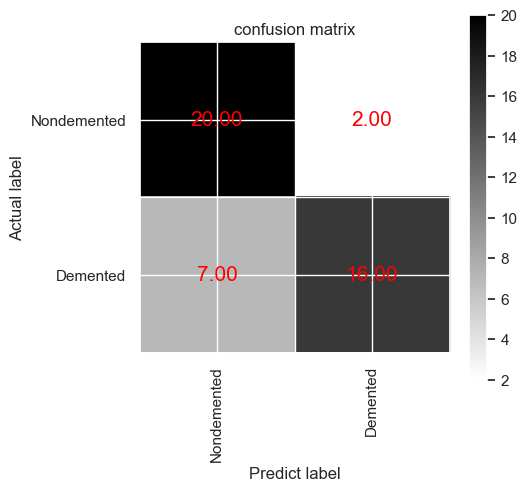

In [27]:
cm = confusion_matrix(Y_test, PredictedOutput)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix')

In [28]:
import pickle

In [29]:
# Make pickle file of our model
filename = 'RFmodel.pkl'
pickle.dump(SelectedRFModel, open(filename, "wb"))

In [30]:
load_model = pickle.load(open(filename,'rb'))

In [31]:
load_model.predict(X_test)

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [32]:
X_test

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
114,0,76,16,3.0,26.0,1391,0.705,1.262
62,0,66,18,2.0,30.0,1504,0.725,1.167
33,0,72,12,4.0,26.0,1453,0.777,1.208
107,0,65,12,2.0,30.0,1340,0.754,1.309
7,0,66,12,3.0,30.0,1447,0.769,1.213
100,0,73,11,4.0,30.0,1475,0.726,1.190
40,1,71,12,4.0,20.0,1461,0.724,1.202
86,1,70,16,1.0,25.0,1568,0.696,1.119
76,0,61,16,1.0,30.0,1513,0.771,1.160
71,1,78,12,4.0,21.0,1477,0.672,1.188


In [33]:
import gradio as gr
def make_prediction(MF, Age, EDUC, SES, MMSE, eTIV, nWBV, ASF):
    with open("RFModel.pkl", "rb") as f:
        SelectedRFModel  = pickle.load(f)
        preds = SelectedRFModel.predict([[MF, Age, EDUC, SES, MMSE, eTIV, nWBV, ASF]])
    if preds == 1:
            return "Demented"
    return "Non-Demented"

#Creating the input component for Gradio

MF = gr.Number(label = "Enter the Gender of the Individual {1:Male, 0:Female}")
Age = gr.Number(label= "Enter the AGE")
EDUC = gr.Number(label = "Enter Education level")
SES = gr.Number(label = "Enter Socio Economic Status")
MMSE = gr.Number(label = "Enter MMSE number")
eTIV= gr.Number(label = "Enter eTIV number")
nWBV= gr.Number(label = "Enter nWBV number")
ASF = gr.Number(label = "Enter ASF number")

# We create the output
output = gr.Textbox()


app = gr.Interface(fn = make_prediction, inputs=[MF, Age, EDUC, SES, MMSE, eTIV, nWBV, ASF], outputs=output)
app.launch()


Thanks for being a Gradio user! If you have questions or feedback, please join our Discord server and chat with us: https://discord.gg/feTf9x3ZSB
Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [34]:
print(classification_report(Y_test, PredictedOutput))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82        22
           1       0.89      0.70      0.78        23

    accuracy                           0.80        45
   macro avg       0.81      0.80      0.80        45
weighted avg       0.82      0.80      0.80        45



c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
